# Как сгенерировать случайную величину? 

__Тут будет клёвый список сериалов__

- HIMYM
- Клиника

> Блок с отступами



In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as sts

$$
X \sim N(0,3)
$$

In [27]:
norm_rv = sts.norm(loc=0, scale=3)

x = norm_rv.rvs(1000, random_state=42)
x.size

1000

In [28]:
x.mean()

0.05799616746697647

In [29]:
x.std()

2.936178623242063

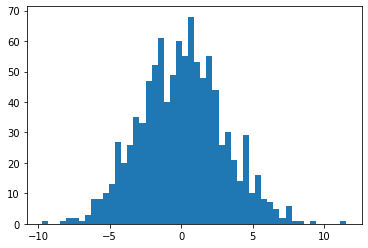

In [30]:
plt.hist(x, bins=50);

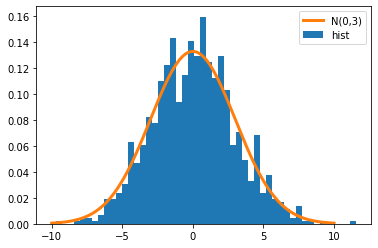

In [37]:
xq = np.linspace(-10, 10, 500)
y = norm_rv.pdf(xq)

plt.hist(x, bins=50, density=True, label='hist')
plt.plot(xq, y, lw=3, label='N(0,3)')
plt.legend();

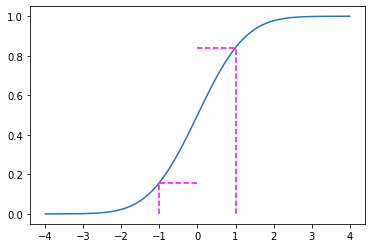

In [97]:
norm_rv = sts.norm(loc=0, scale=1)
xq = np.linspace(-4, 4, 500)
y = norm_rv.cdf(xq)

plt.plot(xq, y)
plt.plot([1, 1], [0, norm_rv.cdf(1)], ls='--', color='magenta')
plt.plot([0, 1], [norm_rv.cdf(1), norm_rv.cdf(1)], ls='--', color='magenta')
plt.plot([-1, -1], [0, norm_rv.cdf(-1)], ls='--', color='magenta')
plt.plot([0, -1], [norm_rv.cdf(-1), norm_rv.cdf(-1)], ls='--', color='magenta');

In [102]:
norm_rv.cdf(-1) + norm_rv.cdf(1)

1.0

__Упражнение 1__

- $\mathbb{P}(X \le -1) = F(-1)$
- $\mathbb{P}(X \in [-5, -3]) = \int_{-5}^{-3} f_X(t) dt = F(-3) - F(-5) = 1 - F(3) - (1 - F(5)) = F(5) - F(3)$

In [38]:
norm_rv.cdf(-1)

0.36944134018176367

In [39]:
norm_rv.cdf(-3) - norm_rv.cdf(-5)

0.11086490165864238

In [42]:
(x < -1).mean()

0.368

Что такое пакет: 

In [3]:
np.pi

3.141592653589793

In [4]:
np.cos(np.pi)

-1.0

In [5]:
?np.mean

# ЗБЧ (Закон больших чисел) 

Если $X_1, \ldots X_n \sim iid$ и $\mathbb{E}(X_i) = \mu$ и $\mathbb{E}(X^2_i) < \infty$, тогда 

$$
\frac{X_1 + \ldots + X_n}{n} \to \mu
$$

Сходимость будет по вероятности. 

In [50]:
np.arange(1, 7)

array([1, 2, 3, 4, 5, 6])

In [88]:
x = np.random.randint(1, 7, size=(100, 5000))
x = np.cumsum(x, axis=1)

n = np.arange(1, x.shape[1] + 1)
x = x/n
x

array([[2.        , 3.        , 2.66666667, ..., 3.48039216, 3.4804961 ,
        3.4806    ],
       [6.        , 5.        , 4.        , ..., 3.50460184, 3.5045009 ,
        3.5042    ],
       [5.        , 5.5       , 5.66666667, ..., 3.47719088, 3.47729546,
        3.477     ],
       ...,
       [2.        , 3.5       , 4.33333333, ..., 3.50820328, 3.5085017 ,
        3.508     ],
       [5.        , 3.5       , 2.66666667, ..., 3.5030012 , 3.50330066,
        3.5038    ],
       [3.        , 2.        , 2.66666667, ..., 3.46218487, 3.46189238,
        3.4616    ]])

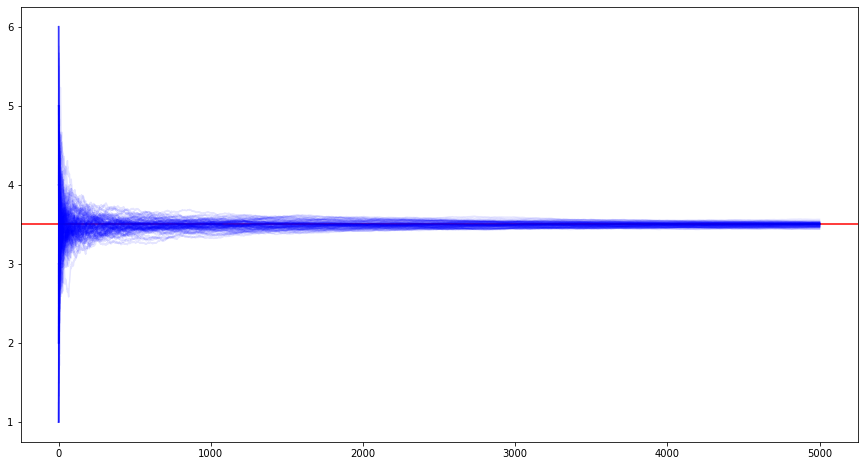

In [89]:
plt.figure(figsize=(15,8))
plt.axhline(y=3.5, color='r', linestyle='-')
plt.plot(x.T, color='blue', alpha=0.1);

### Симуляции 

$$X_1 \sim Poiss(3), X_2 \sim Exp(0.1),  Y = X_1 + X_2^2$$

$$\mathbb{P}(Y > 0.5 \mid X_1 < 3) = ?$$


In [125]:
x1 = sts.poisson(3).rvs(1000)
x2 = sts.expon(scale=1/0.1).rvs(1000)
y = x1 + x2**2

(y[x1 < 3] > 0.5).mean()

0.9930715935334873

In [111]:
(x1 < 3).sum()

424

Симуляции - это очень классно, но работает вообще не всегда... 

$$ X \sim N(0, 3), \quad Y = \frac{1}{1 + X^2}, \quad \mathbb{E}(Y) - ?$$

In [121]:
x = sts.norm(0,1).rvs(1000)
y = 1/(1 + x**2)
y.mean()

0.6572136256550432

$$ X \sim N(0, 3), \quad Y = \frac{1}{X}, \quad \mathbb{E}(Y) - ?$$

In [123]:
x = sts.norm(0,1).rvs(1000)
y = 1/x
y.mean() # У распеделения Коши нет мат ожидания и поэтому при каждом запуске получается новое число (ЗБЧ не работает)

-2.7319454761064152

### Про удава Анатолия



Удав Анатолий любит французские багеты. У него есть багет длиной 1 метр. Каждый укус Анатолия $X_i \sim U[0,1]$. За сколько укусов в среднем Анатолий будет съедать Багет?

In [131]:
umiform_rv = sts.uniform(0,1)

def ukus(l=1):
    k = 0
    while l > 0:
        k += 1 # k = k + 1
        l -= umiform_rv.rvs()
    return k

ukus()

4

In [135]:
# На самом деле E(N) = e
np.mean([ukus() for i in range(10000)])

2.722

In [134]:
np.mean([ukus(l=3) for i in range(1000)])

6.629

Ну да ну да... Есть табличные распределения вроде нормального, экспоненциального, бета-распределения... И их можно симулировать. А что делать, если у меня есть какое-то моё личное распрделение и я хочу его? 

Тогда вам поможет _Квантильное преобразование!_

## Квантильное преобразование

__Упражнение 1__

$$
X \sim N(0,1), \quad Y = X^2, \quad Y \sim \chi^2_1
$$

$$
F_Y(y) = \mathbb{P}(Y \le y) = \mathbb{P}(X^2 \le y) = \mathbb{P}(-\sqrt{y} \le X \le \sqrt{y}) = F_X(\sqrt{y}) - F_X(-\sqrt{y}) = F_X(\sqrt{y}) - (1 - F_X(\sqrt{y})) = 2F_X(\sqrt{y}) - 1
$$

$$
f_Y(y) = F'_Y(y) = 2f_X(\sqrt{y})\cdot \frac{1}{\sqrt{y}} = \frac{2}{\sqrt{2 \pi y}} \cdot e^{-\frac{y}{2}}
$$

__Упражнение 2__

$X \sim$ как угодно

$Y = F_X(X), \quad Y \sim ?$

$$
F_Y(y) = \mathbb{P}(Y \le y) = \mathbb{P}(F_X(X) \le y) = \mathbb{P}(X \le F^{-1}(y)) = F(F^{-1}(y)) = y
$$

$$
f_Y(y) = \begin{cases} 1, y \in [0;1] \\ 0, \text{иначе} \end{cases}
$$



Да это же равномерное распределение! 

Я хочу сгенерировать выборку из функции распределения $F(x) = 1 - e^{-x}, x \ge 0$.

1. $Y \sim U[0; 1]$
2. $X = F^{-1}(Y)$

Тогда $X \sim F_X$

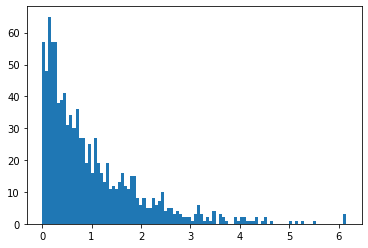

In [138]:
y = sts.uniform(0,1).rvs(1000)
x = -np.log(1 - y)
plt.hist(x, bins=100);

# ЦПТ (Центральная предельная теорема) 

In [142]:
uniform_rvs = sts.uniform(0,1)

x1 = uniform_rvs.rvs(10000)
x2 = uniform_rvs.rvs(10000)
x3 = uniform_rvs.rvs(10000)
x4 = uniform_rvs.rvs(10000)
x5 = uniform_rvs.rvs(10000)

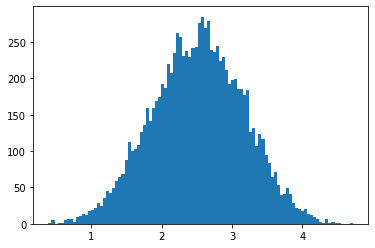

In [147]:
plt.hist(x1 + x2 + x3 + x4 + x5, bins=100);